## Assignment 3
## Question 2
### Name: Saikat Moi
### Roll Number: 20CS10050

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

## Part A: Probability

In [10]:
k = 4  
n = 4  
simulations = 1000  
results = []
probabilities = [1 / (2 ** (k - 1))] + [(1 / (2 ** (i - 1))) for i in range(2, k+1)]


for _ in range(simulations):
    rolls = np.random.choice(range(1, k + 1), n, p=probabilities)
    results.append(sum(rolls))


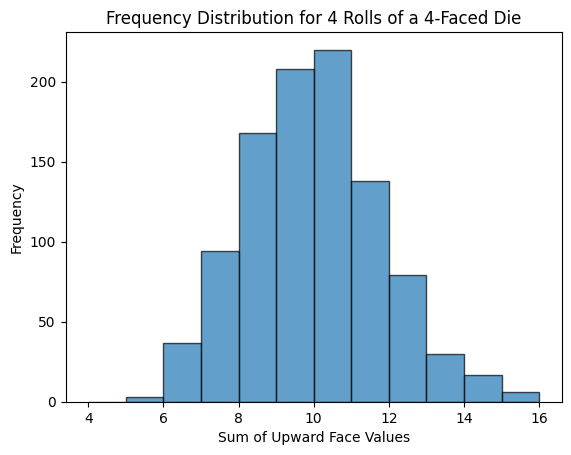

In [12]:
plt.hist(results, bins=range(n, n * k + 1), edgecolor='k', alpha=0.7)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution for {n} Rolls of a {k}-Faced Die')
plt.show()

In [13]:
summary = (np.min(results), np.percentile(results, 25), np.median(results), np.percentile(results, 75), np.max(results))
print(f"Five-Number Summary: {summary}")
expected_sum = sum((i + 1) * probabilities[i] for i in range(k))
print(f"Theoretical Expected Sum: {expected_sum}")

Five-Number Summary: (5, 8.0, 9.0, 11.0, 15)
Theoretical Expected Sum: 2.375


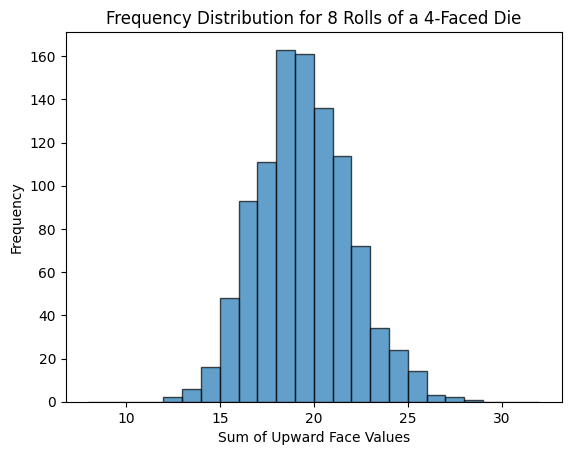

Five-Number Summary: (12, 17.0, 19.0, 21.0, 28)
Theoretical Expected Sum: 2.375


In [14]:
k = 4  # Number of faces on the die
n = 8  # Number of rolls in each trial
simulations = 1000  # Number of trials
results = []
for _ in range(simulations):
    rolls = np.random.choice(range(1, k + 1), n, p=probabilities)
    results.append(sum(rolls))

# Plot histogram
plt.hist(results, bins=range(n, n * k + 1), edgecolor='k', alpha=0.7)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution for {n} Rolls of a {k}-Faced Die')
plt.show()

# Print five-number summary
summary = (np.min(results), np.percentile(results, 25), np.median(results), np.percentile(results, 75), np.max(results))
print(f"Five-Number Summary: {summary}")

# Calculate theoretical expected sum
expected_sum = sum((i + 1) * probabilities[i] for i in range(k))
print(f"Theoretical Expected Sum: {expected_sum}")


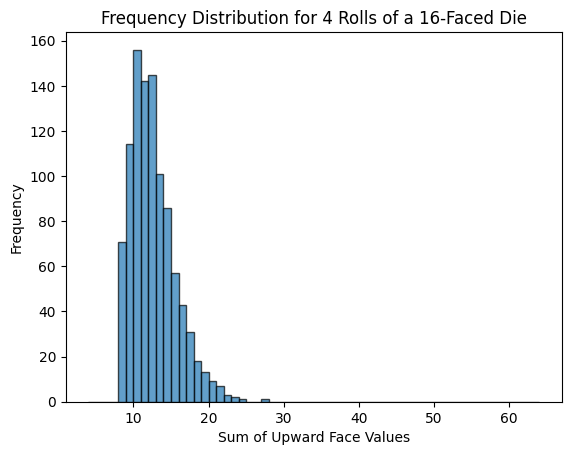

Five-Number Summary: (8, 10.0, 12.0, 14.0, 27)
Theoretical Expected Sum: 2.999481201171875


In [16]:
k = 16 
n = 4 
simulations = 1000  
results = []
probabilities = [1 / (2 ** (k - 1))] + [(1 / (2 ** (i - 1))) for i in range(2, k+1)]

for _ in range(simulations):
    rolls = np.random.choice(range(1, k + 1), n, p=probabilities)
    results.append(sum(rolls))

# Plot histogram
plt.hist(results, bins=range(n, n * k + 1), edgecolor='k', alpha=0.7)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution for {n} Rolls of a {k}-Faced Die')
plt.show()

# Print five-number summary
summary = (np.min(results), np.percentile(results, 25), np.median(results), np.percentile(results, 75), np.max(results))
print(f"Five-Number Summary: {summary}")

# Calculate theoretical expected sum
expected_sum = sum((i + 1) * probabilities[i] for i in range(k))
print(f"Theoretical Expected Sum: {expected_sum}")


## Part B: Implementation of Naive Bayes (From Scratch)

In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

X = spambase.data.features
y = spambase.data.targets
# Identify columns with missing values and handle them (e.g., impute with mean)
X.fillna(X.mean(), inplace=True)

# Identify and process string columns
string_columns = X.select_dtypes(include=[object]).columns

for column in string_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Remove non-numeric columns that cannot be converted
X = X.select_dtypes(include=[int, float])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42)





def plot_distribution(data, column_name):
    plt.hist(data, bins=20, density=True, alpha=0.6, color='b')
    plt.title(f'Probability Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Probability')
    plt.show()

# Example: Plot probability distribution for the first 5 columns
# for i in range(5):
#     column_name = X_train.columns[i]  # Use the correct column label here
#     plot_distribution(X_train[column_name], column_name)



C:\Users\Saikat Moi\AppData\Local\Temp\ipykernel_552\2596609481.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [134]:
class_priors = {}
total_samples = len(y_train)
for cls in np.unique(y_train):
    class_samples = len(y_train[y_train == cls])
    class_priors[cls] = class_samples / total_samples
print("Class Priors:")
print(class_priors)

Class Priors:
{0: 1.0, 1: 1.0}


In [152]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.mean = {}
        self.std = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            self.class_priors[cls] = len(y[y == cls]) / len(y)
            self.mean[cls] = np.mean(X[y == cls], axis=0)
            self.std[cls] = np.std(X[y == cls], axis=0)

    def predict(self, X, y_test):
        predictions = []
        filtered_X = []  # To store only numeric samples
        filtered_y_test = []  # To store corresponding numeric y test values

        for sample, y_value in zip(X, y_test):
            if all(isinstance(feature, (int, float)) for feature in sample):
                class_probs = {}
                for cls in self.classes:
                    class_probs[cls] = np.log(self.class_priors[cls])
                    for i, feature in enumerate(sample):
                        mean_value = self.mean[cls][i]
                        std_value = self.std[cls][i]
                        
                        if std_value != 0:  # Ensure division by zero is avoided
                            log_likelihood = -0.5 * ((feature - mean_value) ** 2 / (std_value ** 2))
                            class_probs[cls] += log_likelihood
                
                predictions.append(max(class_probs, key=class_probs.get))
                filtered_X.append(sample)
                filtered_y_test.append(y_value)

        return predictions, filtered_X, filtered_y_test

In [153]:
naive_bayes = NaiveBayesClassifier()
naive_bayes.fit(X_train, y_train)

In [154]:
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


In [155]:
print(X_val.dtypes)

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [156]:
y_val_pred, X_val_filtered, y_val_filtered = naive_bayes.predict(X_val, y_val)

In [157]:
accuracy_val, precision_val, recall_val, f1_val = evaluate(y_val_filtered, y_val_pred)
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall: {recall_val:.2f}")
print(f"F1 Score: {f1_val:.2f}")

Validation Set Metrics:
Accuracy: nan
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [161]:
X_train_log = np.log(X_train + 1e-10)
X_val_log = np.log(X_val + 1e-10)

# Retrain the Naive Bayes model with the log-transformed data
naive_bayes_log = NaiveBayesClassifier()
naive_bayes_log.fit(X_train_log, y_train)

# Step 5 (again): Predict and evaluate with log-transformed data
y_val_pred_log,X_val_t_lig,y_val_t_log = naive_bayes_log.predict(X_val_log,y_val)
accuracy_log, precision_log, recall_log, f1_log = evaluate(y_val_t_log, y_val_pred_log)
print("Validation Set Metrics with Log Transformation:")
print(f"Accuracy: {accuracy_log:.2f}")
print(f"Precision: {precision_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print(f"F1 Score: {f1_log:.2f}")

Validation Set Metrics with Log Transformation:
Accuracy: nan
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Part C: Implemention of Naive Bayes (sklearn)

In [162]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

spambase = fetch_ucirepo(id=94)


X = spambase.data.features
y = spambase.data.targets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42)

In [163]:
nb_original = GaussianNB()
nb_original.fit(X_train, y_train)
X_train_log = np.log1p(X_train)
nb_log_transformed = GaussianNB()
nb_log_transformed.fit(X_train_log, y_train)


y_score_original = nb_original.predict_proba(X_val)[:, 1]
y_score_log = nb_log_transformed.predict_proba(np.log1p(X_val))[:, 1]

fpr_original, tpr_original, _ = roc_curve(y_val, y_score_original)
roc_auc_original = auc(fpr_original, tpr_original)

fpr_log, tpr_log, _ = roc_curve(y_val, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)


c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


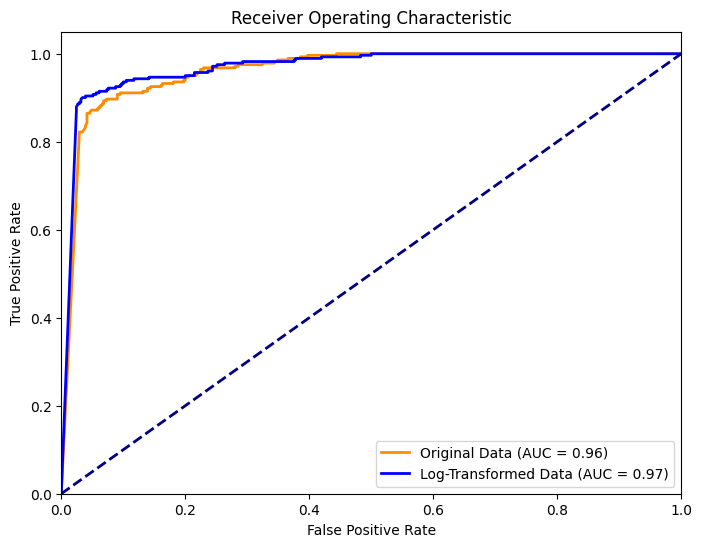

Accuracy of the selected Naive Bayes model: 0.84


In [164]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label=f'Original Data (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Log-Transformed Data (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


if roc_auc_original > roc_auc_log:
    best_nb_model = nb_original
    X_test_for_accuracy = X_test
else:
    best_nb_model = nb_log_transformed
    X_test_for_accuracy = np.log1p(X_test)


accuracy = best_nb_model.score(X_test_for_accuracy, y_test)

print(f'Accuracy of the selected Naive Bayes model: {accuracy:.2f}')